In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x:float) -> float:
    return np.sin(3**x) - np.cos(3*x) + 0.3

def df(x:float) -> float:
    return np.cos(3**x)*3**x*np.log(3) + 3*np.sin(3*x)

[(-1.5, 1.5)]

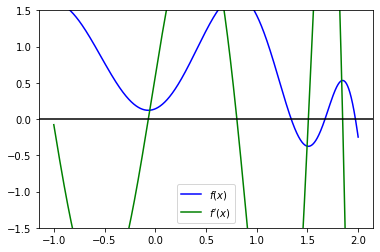

In [3]:
x_data = np.linspace(-1, 2, 10000)
fig, axs = plt.subplots()
axs.plot(x_data, f(x_data), label="$f(x)$", color="blue")
axs.plot(x_data, df(x_data), label="$f'(x)$", color="green")
axs.legend()
ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='k')
axs.set(ylim=(-1.5, 1.5))
#plt.savefig("2.2_plot.png", dpi=500)

In [11]:
def Newton_method(root_loc:list, f, df) -> list:
    x = [(root_loc[0] + root_loc[1])/2]
    eps = 1e-12
    x.append(x[-1] - f(x[-1])/df(x[-1]))
    while np.abs(x[-1] - x[-2]) > eps/2:
        x.append(x[-1] - f(x[-1])/df(x[-1]))
    return x

def Secant_method(root_loc: list, f, df) -> list:
    x = [(root_loc[0] + root_loc[1])/2]
    eps = 1e-12
    x.append(x[-1] + 2*eps)
    while np.abs(x[-1] - x[-2]) > eps/2:
        x.append(x[-1] - (f(x[-1])*(x[-1] - x[-2]))/(f(x[-1]) - f(x[-2])))
    return x

In [113]:
d = [[1.2, 1.4], [1.6, 1.8], [1.9, 2.0]]

In [114]:
res1 = [Newton_method(loc, f, df) for loc in d]
res2 = [Secant_method(loc, f, df) for loc in d]
for i in range(3):
    print("{:.13f} & {} & {} \\\ \hline".format(res1[i][-1], len(res1[i]), len(res2[i])))

1.3400823839084 & 6 & 8 \\ \hline
1.6732949336289 & 5 & 7 \\ \hline
1.9730518797929 & 6 & 8 \\ \hline


In [117]:
def Newton_modified(root_loc:list, f, df) -> list:
    x = [(root_loc[0] + root_loc[1])/2]
    y = [np.abs(f(x[-1]))]
    eps = 1e-12
    x.append(x[-1] - f(x[-1])/df(x[-1]))
    y.append(np.abs(f(x[-1])))
    i = 10
    while i:
        x.append(x[-1] - f(x[-1])/df(x[-1]))
        y.append(np.abs(f(x[-1])))
        i -= 1
    return y

def Secant_modified(root_loc: list, f, df) -> list:
    x = [(root_loc[0] + root_loc[1])/2]
    y = [np.abs(f(x[-1]))]
    eps = 1e-12
    x.append(x[-1] + 1e9*eps)
    y.append(np.abs(f(x[-1])))
    i = 10
    while f(x[-1]) - f(x[-2]) != 0 and i:
        x.append(x[-1] - (f(x[-1])*(x[-1] - x[-2]))/(f(x[-1]) - f(x[-2])))
        y.append(np.abs(f(x[-1])))
        i -= 1
    return y

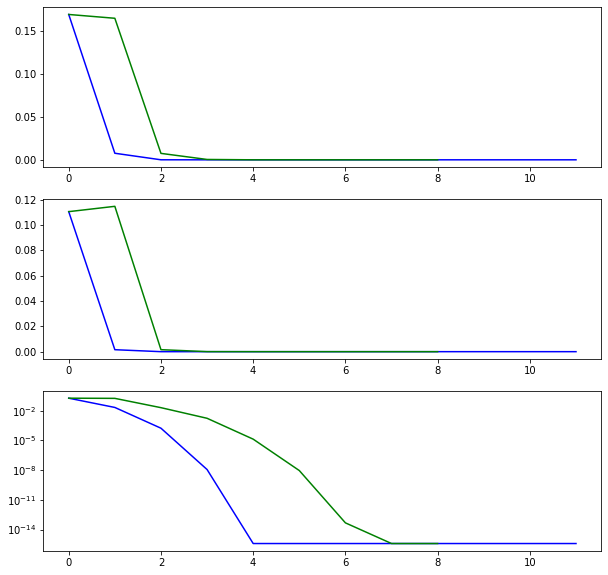

In [118]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
plt.yscale('log')
for i in range(3):
    sec_res = Secant_modified(d[i], f, df)
    newt_res = Newton_modified(d[i], f, df)
    axs[i].plot(range(len(newt_res)), newt_res , color='blue')
    axs[i].plot(range(len(sec_res)), sec_res , color='green')
